In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
df.tail()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.333,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.131,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.107,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.133,150.011,4.0,0.623,0,First Contact,Twin Moons
2016,2016,0.00281,0.446,204520,0.915,0.000039,9,0.2180,-6.221,1,0.141,190.013,4.0,0.402,0,I Wanna Get Better,Bleachers


In [5]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

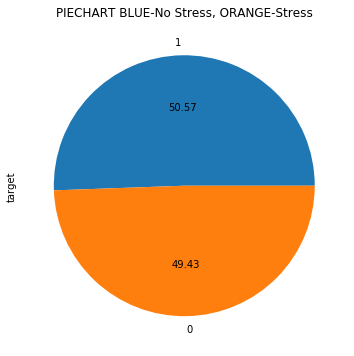

In [6]:
df['target'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("PIECHART BLUE-No Stress, ORANGE-Stress");

In [7]:
liked    = df[df['target']==1]
not_liked = df[df['target']==0]

In [8]:
print("Total =", len(df))

print("Number of songs liked =", len(liked))
print("Percentage liked =", 1.*len(liked)/len(df)*100.0, "%")
 
print("Did not like", len(not_liked))
print("Percentage of not liked =", 1.*len(not_liked)/len(df)*100.0, "%")

Total = 2017
Number of songs liked = 1020
Percentage liked = 50.57015369360436 %
Did not like 997
Percentage of not liked = 49.42984630639564 %


# Linear Regression

In [9]:
abc=df['energy']

In [10]:
X=pd.DataFrame(abc)

In [11]:
X

,energy
0,0.434
1,0.359
2,0.412
3,0.338
4,0.561
...,...
2012,0.932
2013,0.892
2014,0.935
2015,0.992


In [12]:
abc1=df['loudness']

In [13]:
y=pd.DataFrame(abc1)

In [14]:
y

,loudness
0,-8.795
1,-10.401
2,-7.148
3,-15.236
4,-11.648
...,...
2012,-3.501
2013,-2.663
2014,-2.467
2015,-2.735


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
y_pred = regressor.predict(X_test)

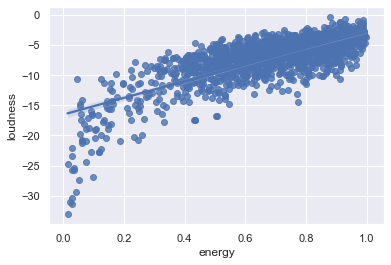

In [18]:
import seaborn as sns
sns.set(color_codes=True)

dataframe_training = pd.DataFrame()
dataframe_training['energy'] = X_train['energy']
dataframe_training['loudness'] = y_train
ax = sns.regplot(x="energy", y="loudness", data= dataframe_training)

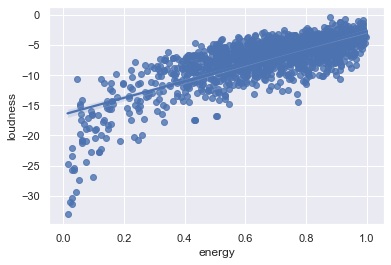

In [19]:
dataframe_test = pd.DataFrame()
dataframe_test['energy'] = X_test['energy']
dataframe_test['loudness'] = y_test
ax = sns.regplot(x="energy", y="loudness", data= dataframe_training)

In [20]:
print('Coefficients: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[13.86826977]]
Intercept: 
 [-16.54124072]


In [21]:
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))

Mean squared error: 5.3922265933392195


In [22]:
print("Variance score: {}".format(r2_score(y_test, y_pred)))

Variance score: 0.5566305483601801


In [23]:
print("r2 score: {}".format(r2_score(y_test,y_pred)))

r2 score: 0.5566305483601801


In [24]:
import statsmodels.api as sm

In [25]:
x = sm.add_constant(X)

In [26]:
results = sm.OLS(endog = y, exog=x).fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loudness   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     2793.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        10:22:44   Log-Likelihood:                -4656.7
No. Observations:                2017   AIC:                             9317.
Df Residuals:                    2015   BIC:                             9329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.3789      0.184    -89.007      0.000     -16.740     -16.018
energy        13.6350      0.258     52.850      0.000      13.129      14.141
==============================================================================
Omnibus:                      544.468   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2285.628
Skew:                          -1.245   Prob(JB):                         0.00
Kurtosis:                       7.582   Cond. No.                         7.03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
accuracies

array([0.62527922, 0.58980988, 0.64613242, 0.53520339, 0.61659272,
       0.47693003, 0.60264492, 0.54741692, 0.5862797 , 0.55843686])

In [29]:
accuracies.mean()

0.5784726059836651

# Polynomial Regression

In [30]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

In [31]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 5) #try 2,3 and 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

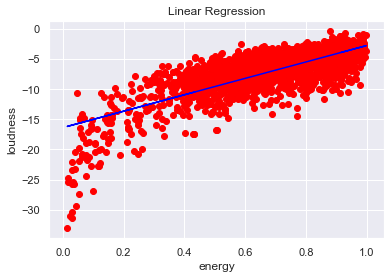

In [33]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor.predict(X), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

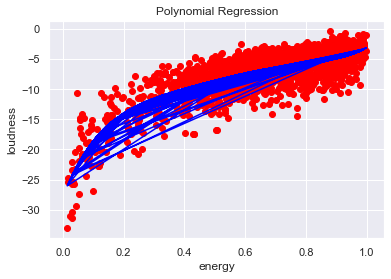

In [34]:
plt.scatter(X, y, color = 'red')
plt.plot(X, linear_regressor_2.predict(polynomial_regressor.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

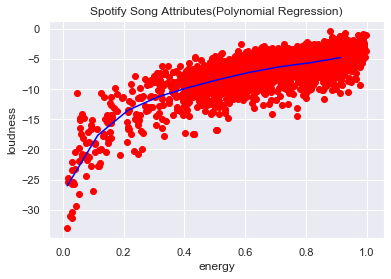

In [35]:
 X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title('Spotify Song Attributes(Polynomial Regression)')
plt.xlabel('energy')
plt.ylabel('loudness')
plt.show()

In [36]:
linear_regressor.predict(np.array(6.5).reshape(-1, 1))

array([[72.24847875]])

In [37]:
linear_regressor_2.predict(polynomial_regressor.fit_transform(np.array(6.5).reshape(-1, 1)))

array([[1727638.95375219]])

In [38]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5)

In [39]:
X_pf=pf.fit_transform(x)
lr=LinearRegression()

In [40]:
lr.fit(X_pf,y)
pred=lr.predict(X_pf)

In [43]:
rmse=np.sqrt(mean_squared_error(y,pred))
r2=r2_score(y,pred)
print(rmse)
print("accuracy:",r2)

2.124969163201694
accuracy: 0.6807315884676703
